In [1]:
import tweepy
import json
import pandas as pd
from perspective import PerspectiveAPI
from googleapiclient import discovery
import numpy as np
import re
import time
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
path_files ="C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/"
path_data = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/Tweets/"

In [3]:
jsonFile = open(path_files + 'auth.json', 'r')
config = json.load(jsonFile)
jsonFile.close()
API_KEY = config["api_key_1"]

# Clean text and write

In [6]:
strng = "@Cristiano è il nostro #MVP? si: https://google.com"

In [41]:
def clean(x: str):
    if ("http" in x):
        x = re.sub(r'http\S+', '',x)
    x = re.sub('[@#$]', '', x)
    x = re.sub('\n', ' ', x)
    return x

In [8]:
clean(strng)

'Cristiano è il nostro MVP? si: '

In [3]:
df_bad = pd.read_csv(path_data + "bad_activities.csv")
df_good = pd.read_csv(path_data + "good_activities.csv")
df_suspended = pd.read_parquet(path_data + "tweets_bad_suspended.parquet", engine="fastparquet")
df_suspended_good= pd.read_parquet(path_data + "tweets_good_suspended.parquet", engine="fastparquet")
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")

In [40]:
# tweets.head()

In [92]:
# x = list(tweets["text"])
# y = list(tweets["id"])
# count = 0
lst_id = []
lst_text = []
for i in tqdm(range(len(x))):
    lst_id.append(y[i])
    lst_text.append(clean(x[i]))
pd.DataFrame(list(zip(lst_id,lst_text)),columns=["id","text"]).to_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                                                                     line_terminator="\n", encoding="utf-8", index=False)

In [2]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [9]:
lst_final = []
x2 = list(set(esempio["text"]))
for i in tqdm(x2[1:]):
    if len(i.split(" ")) >= 4:
        lst_final.append(i)

In [23]:
n = 11
splited = [lst_final[i::n] for i in range(n)]


In [25]:
count = 0
for i in splited:
    pd.DataFrame(i, columns=["text"]).to_csv(f"C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example_{count}.csv",
                           line_terminator="\n", index=False, encoding="utf-8")
    count = count + 1


In [12]:

# esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example.csv",
#                               lineterminator="\n", low_memory=False, encoding="utf-8")
# esempio

In [87]:
# print(len(x2))
# count = 0
# for i in x2:
#     if len(i.split(" ")) < 4:
#         count = count + 1
#         print(i)
# print(count)
# 1499124 - 69376
# 1500000 / 50000

# Classification

In [3]:
# p = PerspectiveAPI(api_key=API_KEY)
# results = []
# for i in tqdm(texts):
#     time.sleep(1)
#     try:
#         result = p.score(i)
#         results.append(result["TOXICITY"])
#     except Exception as e:
#         print("Error: ", e)

In [70]:
print(f"Primi 1000 tweet Good {0.03} Toxicity score")
print(f"Primi 1000 tweet Good susp {0.10} Toxicity score")
print(f"Primi 1000 tweet Bad susp {0.12} Toxicity score")
print(f"Primi 1000 tweet Bad {0.09} Toxicity score")

Primi 1000 tweet Good 0.03 Toxicity score
Primi 1000 tweet Good susp 0.1 Toxicity score
Primi 1000 tweet Bad susp 0.12 Toxicity score
Primi 1000 tweet Bad 0.09 Toxicity score


In [2]:
# client = discovery.build(
#   "commentanalyzer",
#   "v1alpha1",
#   developerKey=API_KEY,
#   discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
#   static_discovery=False,
# )

# analyze_request = {
#   'comment': { 'text': "guarda, sei bravo!"},
#   'requestedAttributes': {'TOXICITY': {}}
# }

# response = client.comments().analyze(body=analyze_request).execute()
# print(json.dumps(response, indent=2))

# Ricomposizione DF

In [37]:
tweets = pd.read_parquet(r"../Files/Tweets/tweets.parquet", engine="fastparquet")[["id","user_screen_name","text","urls","hashtags","created_at"]]

In [38]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/script_directory_output/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [39]:
esempio.head()

,id,text
0,1221739084449832960,La Memoria è l’unico vaccino contro l’indiffer...
1,1221737155380293640,"Oggi sono arrivati loro, 3 femminucce e 1 masc..."
2,1221730009989120001,L'indifferenza è più colpevole della violenza ...
3,1221737654909382662,"Minaccia morbillo nel Salento, Asl: ""Vaccinars..."
4,1221728980203724801,"""Coltivare la Memoria è ancora oggi un vaccino..."


In [40]:
df = tweets.merge(esempio, on="id", how="left")
df.head()

,id,user_screen_name,text_x,urls,hashtags,created_at,text_y
0,1221739084449832960,planetpaul65,La Memoria è l’unico vaccino contro l’indiffer...,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,La Memoria è l’unico vaccino contro l’indiffer...
1,1221737155380293640,Grace_1207,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",[],[],Mon Jan 27 10:10:11 +0000 2020,"Oggi sono arrivati loro, 3 femminucce e 1 masc..."
2,1221730009989120001,MarisaMinervini,L'indifferenza è più colpevole della violenza ...,[],[],Mon Jan 27 09:41:47 +0000 2020,L'indifferenza è più colpevole della violenza ...
3,1221737654909382662,LecceSette,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,"Minaccia morbillo nel Salento, Asl: ""Vaccinars..."
4,1221728980203724801,arual812,"""Coltivare la Memoria è ancora oggi un vaccino...",[],[],Mon Jan 27 09:37:42 +0000 2020,"""Coltivare la Memoria è ancora oggi un vaccino..."


In [43]:
print(list(df["text_x"])[0])
print("..")
print(list(df["text_y"])[0])

La Memoria è l’unico vaccino contro l’indifferenza.
(Liliana Segre)
#GiornatadellaMemoria2020 https://t.co/JDF9vdg1P9
..
La Memoria è l’unico vaccino contro l’indifferenza. (Liliana Segre) GiornatadellaMemoria2020 


In [42]:
del tweets
del esempio

In [44]:
import warnings
warnings.simplefilter("ignore")
from glob import glob
files = glob(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\script_directory_output\res*.csv")
results = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)
    results = results.append(df_temp)
print(len(results))
results.head()

1376011


,text,toxicity
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538


In [45]:
print(len(df[df["text_y"].notna()]))
df = df[["id","user_screen_name","hashtags","text_y","urls","created_at"]]
df.rename(columns = {'text_y':'text'}, inplace = True)

4024101


In [46]:
res = results.merge(df, on="text", how="right")
res.head()

,text,toxicity,id,user_screen_name,hashtags,urls,created_at
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],Mon Jan 27 10:17:51 +0000 2020
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020
2,L'indifferenza è più colpevole della violenza ...,0.037881,1221730009989120001,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",Mon Jan 27 10:12:10 +0000 2020
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020


In [47]:
print(len(res))
res["date"] = [utils.process_datetime(i) for i in tqdm(res["created_at"])]
np.mean(res["toxicity"])

4053201


0.10749875744084895

Text(0, 0.5, 'Toxicity score')

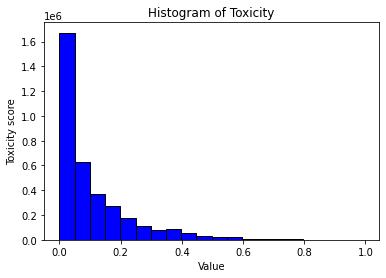

In [48]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(res['toxicity'], color = 'blue', edgecolor = 'black', bins=20)

# Add labels
plt.title('Histogram of Toxicity')
plt.xlabel('Value')
plt.ylabel('Toxicity score')

In [51]:
toxic = res[res["toxicity"]>=0.5]

In [52]:
pd.Series(toxic["user_screen_name"]).value_counts().sort_values(ascending=False)[:20]

Piero42395724      187
trincherov         184
il_brigante07      136
Attyla91461568     116
xenonian1          116
Graziel65255465    114
GiovannaSandr16    107
Sakurauchi_Hime    103
ManuQ24916888       85
gaiagioiared        81
LPincia             78
anto_galli4         77
enzo6619            76
ItalianoeRomano     74
Pietro_Otto         73
manu_etoile         73
IAlianna_           72
PazuDaemon          71
tiber_h             69
jobwithinternet     68
Name: user_screen_name, dtype: int64

# User - Toxicity

In [53]:
res["count_status"] = res.groupby('user_screen_name')["toxicity"].transform('count')
to_df = res[res["count_status"]>10]
to_df["toxicity_score"] = to_df.groupby('user_screen_name')["toxicity"].transform('mean')
to_df = to_df.drop_duplicates(subset='user_screen_name')
to_df
# to_df[["user_screen_name","toxicity_score"]].to_csv(r"../Files/user_toxicity.csv", line_terminator="\n", encoding="utf-8", index=False)

,text,toxicity,id,user_screen_name,hashtags,urls,created_at,date,count_status,toxicity_score
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],Mon Jan 27 10:17:51 +0000 2020,2020-01-27,222,0.123665
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,2020-01-27,261,0.089802
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",Mon Jan 27 10:12:10 +0000 2020,2020-01-27,83,0.027140
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,2020-01-27,562,0.066790
5,Ma prima una premessa per chi non conosce la v...,0.009718,1221732930738905088,pvsassone,[],[],Mon Jan 27 09:53:24 +0000 2020,2020-01-27,1572,0.099055
...,...,...,...,...,...,...,...,...,...,...
3883832,DL44: si potrebbe fare di peggio? Per il centr...,0.028954,1392052037341360129,AttivaResistenz,[],"[{'url': 'https://t.co/btrH8cRORy', 'expanded_...",Tue May 11 09:40:43 +0000 2021,2021-05-11,12,0.046130
3883917,DL44: si potrebbe fare di peggio? Per il centr...,0.028954,1392052631489687555,AttivaLazio,[],[],Tue May 11 09:43:05 +0000 2021,2021-05-11,18,0.063984
3912182,"BFMTV LCI LCI · 2m ""Vite ma dose"" : attention ...",0.109569,1392476194520670208,martinelegendr4,[],"[{'url': 'https://t.co/ayfl3w12e2', 'expanded_...",Wed May 12 13:46:10 +0000 2021,2021-05-12,23,0.090316
3916372,"Covid-19: ultimissima, Tre milioni di dosi per...",0.030328,1392530375612764160,GiNews24,"[{'text': 'breakingnews', 'indices': [69, 82]}...","[{'url': 'https://t.co/oWijkC5YpR', 'expanded_...",Wed May 12 17:21:28 +0000 2021,2021-05-12,15,0.085506


In [54]:
res['dates']= res[["toxicity","date"]].groupby('date').transform('mean')
res_for_plot = res.drop_duplicates(subset='date')

In [55]:
res_for_plot

,text,toxicity,id,user_screen_name,hashtags,urls,created_at,date,count_status,dates
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],Mon Jan 27 10:17:51 +0000 2020,2020-01-27,222,0.071613
395,Quando LaScienza™ fonda le proprie certezze su...,NaN,1222305540904235009,Mr_Ozymandias,"[{'text': 'vaccini', 'indices': [91, 99]}, {'t...",[],Tue Jan 28 23:48:44 +0000 2020,2020-01-28,575,0.100783
1926,A questo bambino hanno amputato tutti e 4 gli ...,0.097633,1213100039112986624,vendutoschifoso,"[{'text': 'vaccini', 'indices': [91, 99]}]",[],Fri Jan 03 14:09:22 +0000 2020,2020-01-03,1033,0.102138
2235,giannantonio51 sciudar Apndp Infatti! Tutti do...,0.070916,1223030947802767361,Alessandra1605,[],[],Thu Jan 30 23:51:15 +0000 2020,2020-01-30,186,0.123403
3850,""" Facciamo un gioco: pensa una cosa veramente ...",0.114721,1223240828329635841,AnnareColonnese,"[{'text': 'coronavirus', 'indices': [77, 89]}]",[],Fri Jan 31 13:45:14 +0000 2020,2020-01-31,98,0.150006
...,...,...,...,...,...,...,...,...,...,...
3922777,Potete rendervi conto da soli di cosa stanno m...,0.020408,1392630974157045762,elisamassimi,[],[],Thu May 13 00:01:12 +0000 2021,2021-05-13,169,0.094579
3949214,"All'improvviso, il genio! * Per favore, in neg...",0.229853,1392994281888133120,ChiccoTech,[],[],Fri May 14 00:04:52 +0000 2021,2021-05-14,6,0.089086
3975514,"Stanno succedendo cose gravissime, da regime t...",0.184506,1393356595132764160,StefaniaVaselli,[],[],Sat May 15 00:04:34 +0000 2021,2021-05-15,955,0.085152
3996248,"Il Nobel Luc Montagnier: -Un "" errore inaccet...",0.040972,1393721664421171207,cidange,[],[],Sun May 16 00:15:13 +0000 2021,2021-05-16,10,0.106017


# Timeline

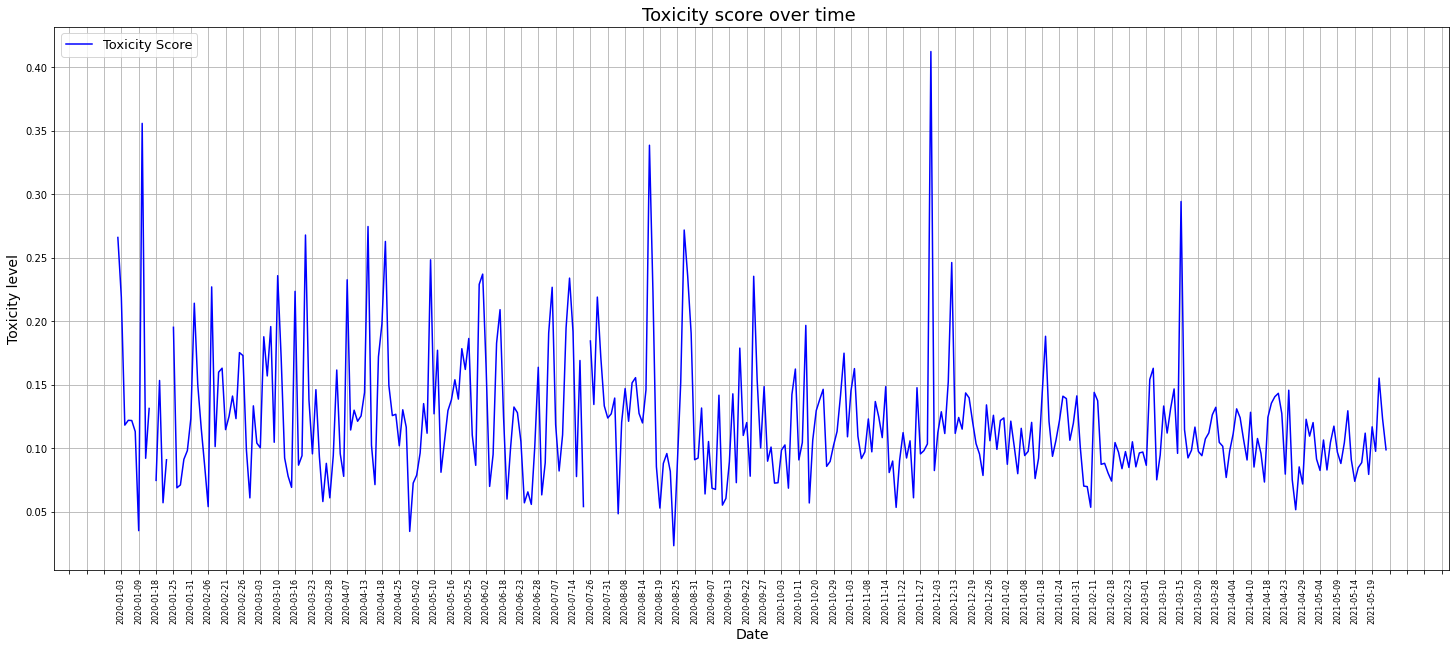

In [29]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Toxicity score over time ', fontsize=18)
res_for_plot.sort_values(by=["date"], ascending=True, inplace=True)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Toxicity level', fontsize=14)

plt.plot(res_for_plot['date'], res_for_plot['dates'], c='b', label='Toxicity Score')
# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8)
plt.legend(loc='upper left', fontsize=13);
# plt.axvline(x="2021-03-09")
plt.grid()
plt.show()

# Toxic Users

In [57]:
res = res[res["count_status"]>10]
toxic = res[res["toxicity"]>0.49]

In [64]:
domains = []
for i in utils.extract_domain_list(toxic):
    if i != "[]":
        for j in i:
            if "youtu.be" in j:
                j = "youtube.com"
            domains.append(j)
pd.Series(domains).value_counts().sort_values(ascending=False)[:15]

twitter.com             68787
youtube.com              2052
ansa.it                  1548
ilgiornale.it            1503
lastampa.it              1206
corriere.it               909
ilfattoquotidiano.it      873
byoblu.com                855
iltempo.it                720
milano.corriere.it        612
tgcom24.mediaset.it       594
repubblica.it             531
t.co                      504
milano.repubblica.it      477
adnkronos.com             477
dtype: int64

In [66]:
# pd.Series(toxic["text"]).value_counts().sort_values(ascending=False)[:15]

In [67]:
communities = pd.read_csv(r"..\Files\networks\louvain.csv")

In [70]:
toxic_merged = toxic.merge(communities, left_on="user_screen_name", right_on="name", how="left")

In [95]:
value = pd.Series(toxic_merged["community"]).value_counts().sort_values(ascending=False)
count = 0
total_values = np.sum(value)
for i in value.index:
    print(str(i) + " - " + str(value[i]) + f" - {round(value[i]/total_values,2)*100}% of total")
    count = count + 1
    if count == 14:
        break
# 4 right
# 0 left
# 2 influencer
# 3 journals

62742 - (38247 + 13809 + 6062 + 3712) 

4.0 - 38247 - 61.0% of total
0.0 - 13809 - 22.0% of total
3.0 - 6062 - 10.0% of total
2.0 - 3712 - 6.0% of total
1.0 - 437 - 1.0% of total
5.0 - 184 - 0.0% of total
8.0 - 72 - 0.0% of total
54.0 - 27 - 0.0% of total
34.0 - 19 - 0.0% of total
2702.0 - 16 - 0.0% of total
382.0 - 9 - 0.0% of total
227.0 - 9 - 0.0% of total
46.0 - 8 - 0.0% of total
2025.0 - 8 - 0.0% of total


912

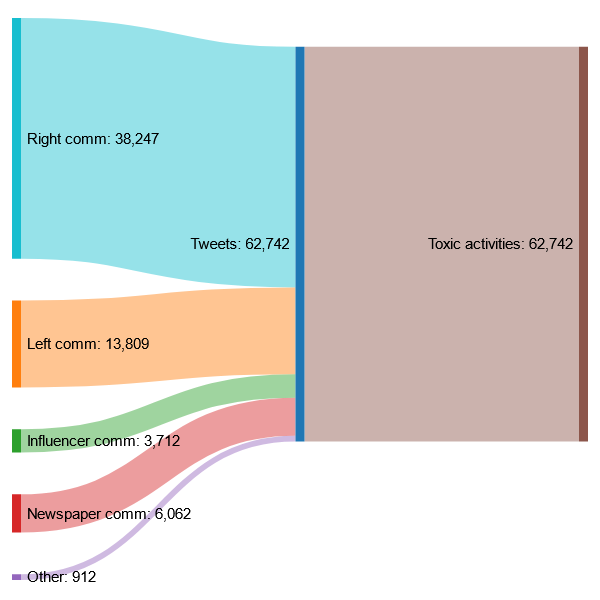

In [96]:
from IPython.display import Image
Image(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\Files\toxic_flow.png")